In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('titanic.csv')

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
print(df['Age'].median())
df['Cabin'].value_counts()

28.0


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [43]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [44]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Embarked'].fillna('4',inplace=True)

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2.0
887,1,1,0,19.0,0,0,30.0000,2.0
888,0,3,0,28.0,1,2,23.4500,2.0
889,1,1,1,26.0,0,0,30.0000,0.0


In [46]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
dt_model = DecisionTreeClassifier(random_state=42)

In [48]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred = dt_model.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', accuracy)

Decision Tree Accuracy: 0.7821229050279329


In [51]:
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Accuracy score: 0.7821229050279329
Confusion matrix: [[83 22]
 [17 57]]
Classification report:               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



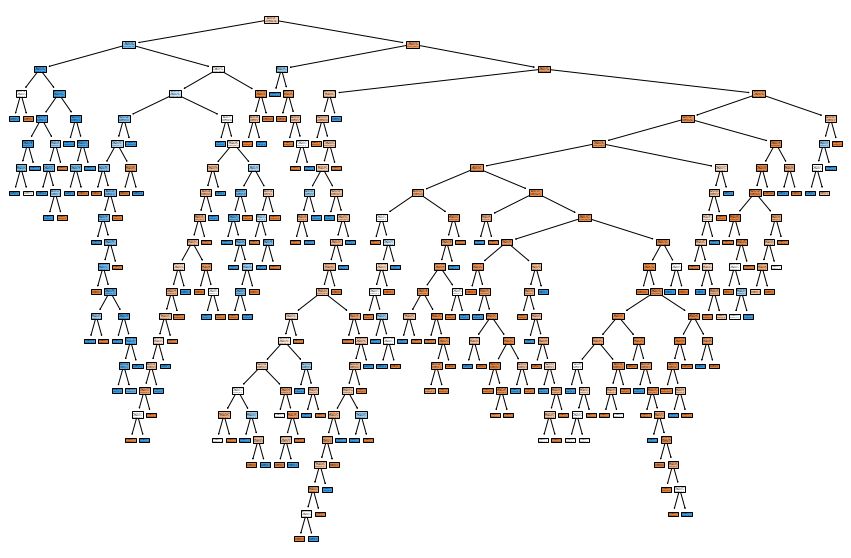

In [63]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True)
plt.show()

In [64]:
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('New Decision Tree Accuracy:', accuracy)

New Decision Tree Accuracy: 0.7988826815642458


In [66]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy:', accuracy)

Random Forest Accuracy: 0.8268156424581006
